# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [77]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [78]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [79]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [80]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [81]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

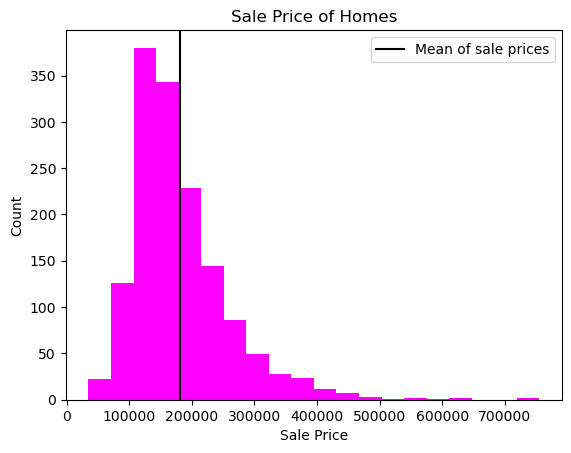

In [108]:
# Your code here
variable = df['SalePrice']

fig, ax = plt.subplots()

ax.hist(variable, color='magenta', bins=20)
ax.set_xlabel('Sale Price')
ax.set_ylabel('Count')
ax.set_title('Sale Price of Homes');

# Add the vertical line for the mean
ax.axvline(variable.mean(), color='k', linestyle='-', label='Mean of sale prices')
plt.legend();

Now, print out the mean, median, and standard deviation:

In [83]:
# Your code here
print('Mean =', variable.mean())
print()
print('Median =', variable.median())
print()
print('STD =', variable.std())

Mean = 180921.19589041095

Median = 163000.0

STD = 79442.50288288663


In the cell below, interpret the above information.

In [84]:
# Replace None with appropriate text
"""
Of the 1,460 homes in our dataset, the average (mean) sale price is about 181,000. Half of the homes sold for less than 163,000, 
the other half for more than 163,000 (this is our median value). Since the mean is higher than the median, we can interpret this 
as the result of a few very expensive homes drawing the average sale price up.

The standard deviation value of about 79,500 is relatively high, suggesting that there is a large variability in sale prices.
"""

'\nOf the 1,460 homes in our dataset, the average (mean) sale price is about 181,000. Half of the homes sold for less than 163,000, \nthe other half for more than 163,000 (this is our median value). Since the mean is higher than the median, we can interpret this \nas the result of a few very expensive homes drawing the average sale price up.\n\nThe standard deviation value of about 79,500 is relatively high, suggesting that there is a large variability in sale prices.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

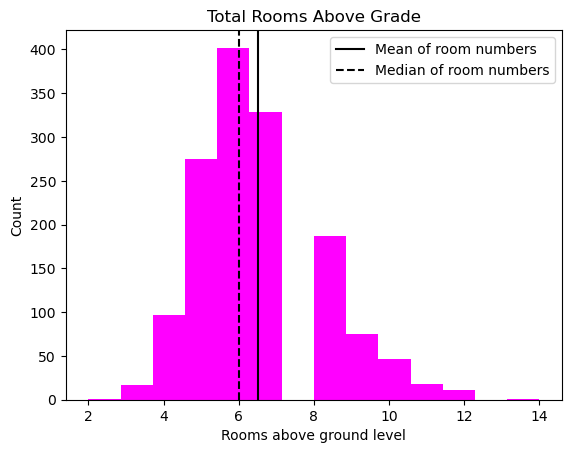

In [85]:
# Your code here
trag_variable = df['TotRmsAbvGrd']

fig, ax = plt.subplots()

ax.hist(trag_variable, color='magenta', bins=14)
ax.set_xlabel('Rooms above ground level')
ax.set_ylabel('Count')
ax.set_title('Total Rooms Above Grade');

# Add the vertical line for the mean and median
ax.axvline(trag_variable.mean(), color='k', linestyle='-', label='Mean of room numbers')
ax.axvline(trag_variable.median(), color='k', linestyle='--', label='Median of room numbers')
plt.legend();

Now, print out the mean, median, and standard deviation:

In [86]:
# Your code here
print('Mean =', trag_variable.mean())
print()
print('Median =', trag_variable.median())
print()
print('STD =', trag_variable.std())

Mean = 6.517808219178082

Median = 6.0

STD = 1.625393290584064


In the cell below, interpret the above information.

In [87]:
# Replace None with appropriate text
"""
Of the 1,460 homes in our dataset, the average (mean) number of rooms listed as above grade is about 6.5. The median value is 6, meaning the exact center 
of the room number spread. The average is slightly higher most likely due to a very small number of extremely large homes with lots of rooms.

The standard deviation value of about 1.5 is moderate, but taken in context with the relatively small range of values for number of rooms in a home, it 
represents a pretty significant variability, as the difference between a 4-room home and an 8 or 9-room home can be quite large in terms of size, price, 
etc.
"""

'\nOf the 1,460 homes in our dataset, the average (mean) number of rooms listed as above grade is about 6.5. The median value is 6, meaning the exact center \nof the room number spread. The average is slightly higher most likely due to a very small number of extremely large homes with lots of rooms.\n\nThe standard deviation value of about 1.5 is moderate, but taken in context with the relatively small range of values for number of rooms in a home, it \nrepresents a pretty significant variability, as the difference between a 4-room home and an 8 or 9-room home can be quite large in terms of size, price, \netc.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

In [88]:
oc_variable = df['OverallCond']
oc_variable.value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

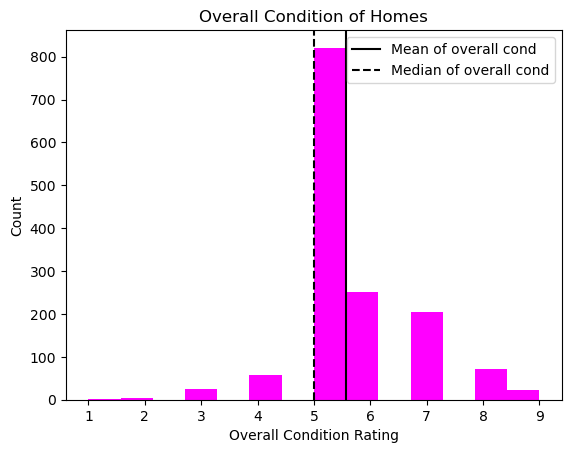

In [89]:
# Your code here
oc_variable = df['OverallCond']

fig, ax = plt.subplots()

ax.hist(oc_variable, color='magenta', bins=14)
ax.set_xlabel('Overall Condition Rating')
ax.set_ylabel('Count')
ax.set_title('Overall Condition of Homes');

# Add the vertical line for the mean and median
ax.axvline(oc_variable.mean(), color='k', linestyle='-', label='Mean of overall cond')
ax.axvline(oc_variable.median(), color='k', linestyle='--', label='Median of overall cond')
plt.legend();

Now, print out the mean, median, and standard deviation:

In [90]:
# Your code here
print('Mean =', oc_variable.mean())
print()
print('Median =', oc_variable.median())
print()
print('STD =', oc_variable.std())

Mean = 5.575342465753424

Median = 5.0

STD = 1.1127993367127367


In the cell below, interpret the above information.

In [91]:
# Replace None with appropriate text
"""
The Overall Condition of the homes is a rating system that consists of whole numbers 1 through 9, presumably "bad" to "good". The average (5.5) and the 
median (5.0) are about the same, with the higher average suggesting that more homes rate higher in condition than the number of homes rating low on the 
scale. As we see from the graph, the number of homes rated 5 outnumbers the other ratings put together. Standard deviation at about 1 is not such a useful 
number in this comparison as the range is so low (1-9).
"""

'\nThe Overall Condition of the homes is a rating system that consists of whole numbers 1 through 9, presumably "bad" to "good". The average (5.5) and the \nmedian (5.0) are about the same, with the higher average suggesting that more homes rate higher in condition than the number of homes rating low on the \nscale. As we see from the graph, the number of homes rated 5 outnumbers the other ratings put together. Standard deviation at about 1 is not such a useful \nnumber in this comparison as the range is so low (1-9).\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [94]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [98]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

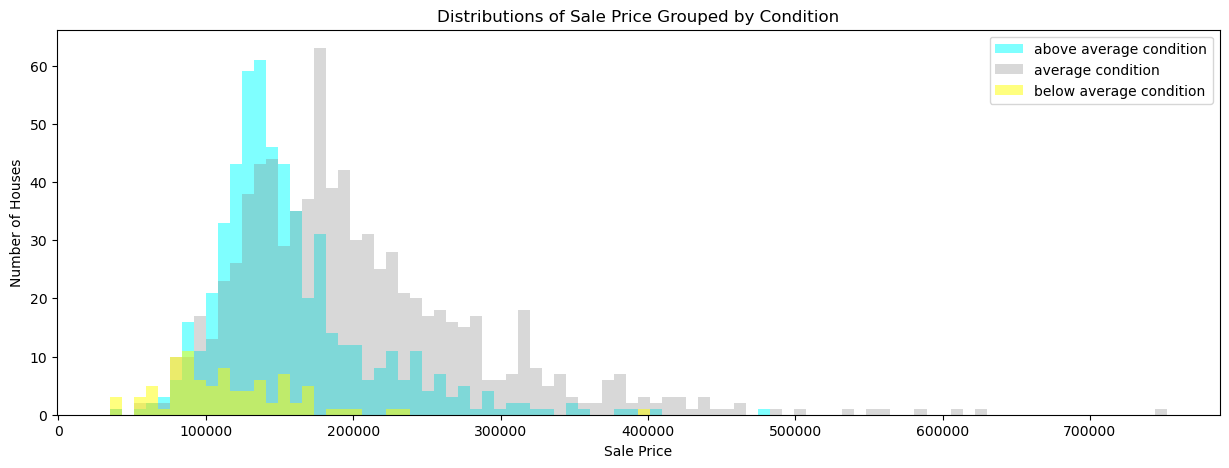

In [99]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [ ]:
# Replace None with appropriate text
"""
The Overall Condition of the homes as it relates to the sale price does have some interesting and perhaps non-intuitive results. As might be expected, 
most of the homes with a below average rating tend to fall on the lower end of the sale price axis. What is interesting is that most of the homes with 
above average ratings also fall on the low end of the sale prices, while average homes tend to sell for more than above average homes, and the majority 
of very expensive homes are of average condition rating as well.
"""

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [101]:
# Your code here
corr_matrix = df.corr(numeric_only=True)
price_corr = corr_matrix['SalePrice']
price_corr = price_corr.drop('SalePrice')  # Exclude self-correlation
most_positive_corr_column = price_corr.idxmax()
most_positive_corr_value = price_corr[most_positive_corr_column]

print(f"Column with most positive correlation with Sale Price: {most_positive_corr_column}")
print(f"Correlation value: {most_positive_corr_value}") # To see the output, run the code.

Column with most positive correlation with Sale Price: OverallQual
Correlation value: 0.7909816005838053


Now, find the ***most negatively correlated*** column:

In [102]:
# Your code here
most_negative_corr_column = price_corr.idxmin()
most_negative_corr_value = price_corr[most_negative_corr_column]

print(f"Column with most negative correlation with Sale Price: {most_negative_corr_column}")
print(f"Correlation value: {most_negative_corr_value}") # To see the output, run the code.

Column with most negative correlation with Sale Price: KitchenAbvGr
Correlation value: -0.13590737084214105


In [114]:
KitchAbGr = df['KitchenAbvGr']
KitchAbGr.value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

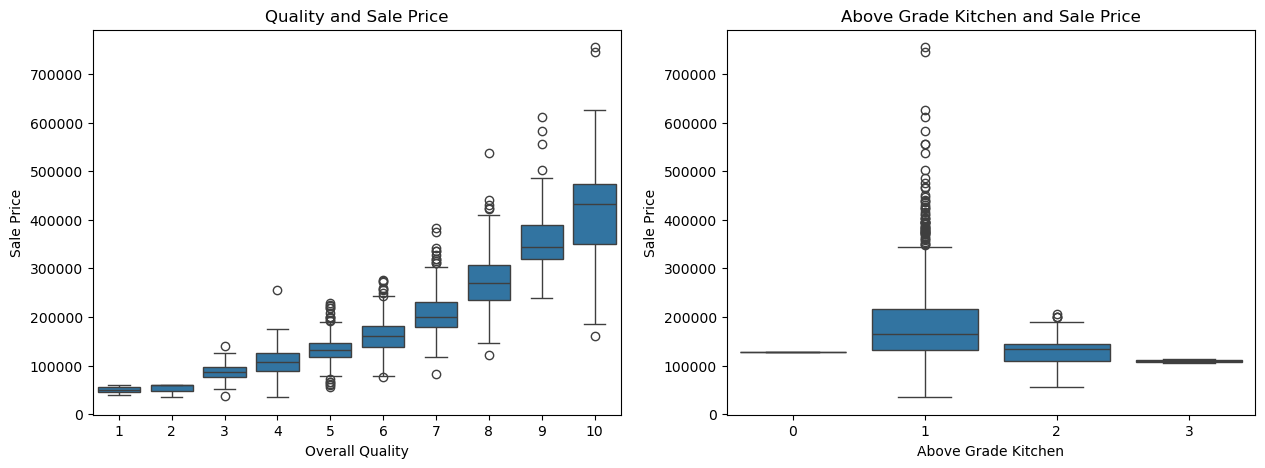

In [106]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['KitchenAbvGr'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Quality and Sale Price")
ax1.set_xlabel("Overall Quality")
ax1.set_ylabel("Sale Price")
ax2.set_title("Above Grade Kitchen and Sale Price")
ax2.set_xlabel("Above Grade Kitchen")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
Not surprisingly, the Overall Quality rating of a home seems to have a direct correlation to the home's sale price. As far as the Kitchen Above Grade 
values, there are only 4 categories (0 - 3), and all but 68 of the 1460 homes are in category 1. The homes in category 1 have a sale price that runs 
the full range of the sale price axis, while the 3 homes in 0 and 3 fall into the lower-than-average spectrum of sale price. The 65 homes in category 2 fall generally 
into the lower end of sale price as well with a few homes just above the average. As the vast majority of homes are in just one category for the Kitchen 
Above Grade column, it seems counter-intuitive to try to establish a coherent argument that draws a correlation between Kitchen Above Grade and Sale Price 
since there are so few homes in the other three categories.
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [115]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

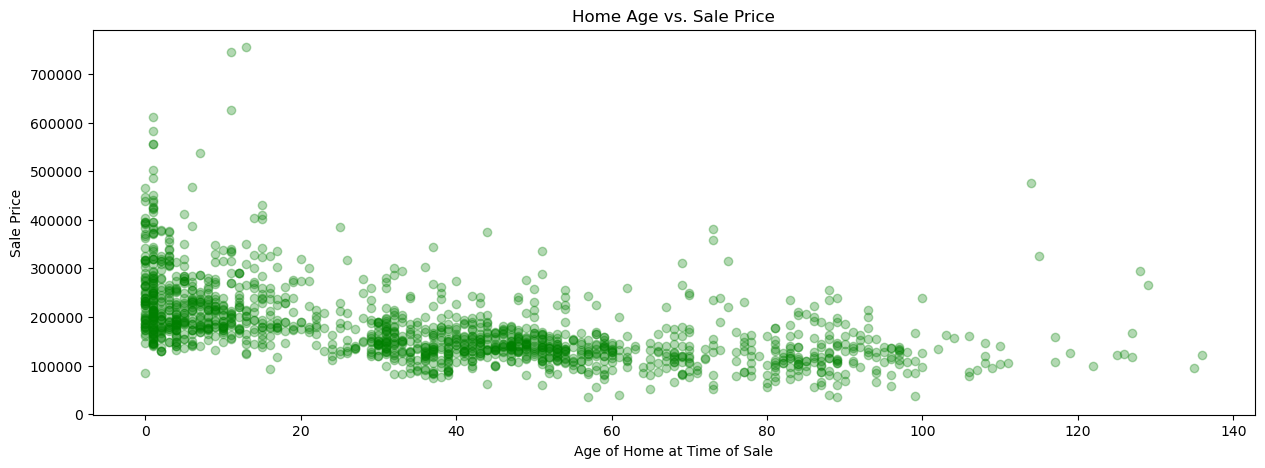

In [116]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
There seems to be a higher concentration of newer homes sold (less than 20 years) that runs the full range of sale prices. There seems to be a slight 
decline in sale prices for homes once they begin reaching the 30-year mark through the 90-or-so mark (where the majority of homes over 30 exist) with a 
few outliers in the more expensive range. From this scatter plot, one would draw the conclusion that newer homes are more likely to sell for more and 
older homes tend to sell for about the average price with a slight decline in sale price as they get older.
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.